# Pandas

Libreria de código abierto y extensión de NumPy para manipulación a análisis de datos en Python.
Permite de forma rápida la limpieza, preparación y análisis de los datos.

## Instalación en Jupyter

* Con anaconda:
```bash
conda install pandas
```
* Sin anaconda
```bash
pip install pandas
```

## Series

In [1]:
import numpy as np # a partir de ahora utilizaremos np (seudonimo) en vez de numpy 
import pandas as pd

In [14]:
etiquetas = ['a','b','c']
datos =[1,2,3]

print(pd.Series(data=datos, index=etiquetas))

# si creamos una serie de datos con arrange, el index es por defecto: 0,1,2,3,4...
datos = np.arange(1,10,2)
print(pd.Series(datos))

# Para acceder a los datos
data = np.arange(1,10,3)
labels = ['venta_1','venta_2','venta_3']
serie = pd.Series(data,labels)

# imprimir serie 
print(serie)
# accedemos a dato 1
print(serie['venta_2'])

# Podemos realizar operaciones sobre estas series. Por ejemplo, vamos a sumarlas:
serie_suma = serie + serie
print(serie_suma)



a    1
b    2
c    3
dtype: int64
0    1
1    3
2    5
3    7
4    9
dtype: int64
venta_1    1
venta_2    4
venta_3    7
dtype: int64
4
venta_1     2
venta_2     8
venta_3    14
dtype: int64


## Dataframes:

In [47]:
import numpy as np
import pandas as pd

# Los dataframes nos permite crear tablas bonitas
filas = ['fila_1', 'fila_2', 'fila_3']
columnas = ['columna_1','columna_2','columna_3']
datos = np.random.randint(1,10,9)
matriz = datos.reshape(3,3) # convertimos el array en una matriz 3x3
dataframe = pd.DataFrame(matriz, filas, columnas) # creamos la tabla
dataframe

,columna_1,columna_2,columna_3
fila_1,3,3,8
fila_2,3,4,1
fila_3,4,1,1


### Dataframes: seleccionar datos de una tabla

In [49]:
import numpy as np
import pandas as pd

# Los dataframes nos permite crear tablas bonitas
filas = ['fila_1', 'fila_2', 'fila_3']
columnas = ['columna_1','columna_2','columna_3']
datos = np.random.randint(1,10,9)
matriz = datos.reshape(3,3) # convertimos el array en una matriz 3x3
dataframe = pd.DataFrame(matriz, filas, columnas) # creamos la tabla

# Seleccionamos primera fila
dataframe.loc['fila_1']

# Si queremos seleecionar varias filas tendriamos que hacer una lista de valores
dataframe.loc[['fila_1', 'fila_2']]

# Si queremos seleccionar una columna
dataframe['columna_1']

# Si queremos selecionar un elemento de la table
dataframe.loc['fila_1']['columna_1']

# Añadimos una nueva columna con la suma de las otras 3
dataframe['suma'] = dataframe['columna_1'] + dataframe['columna_2'] + dataframe['columna_3']

# Eliminar una columna en su representación (aunque no la elimina del dataframe)
dataframe.drop('suma', axis=1)
# Eliminar una columna del dataframe
dataframe.drop('suma', axis=1, inplace=True)

# Eliminar una fila
dataframe.drop('fila_3', inplace=True)

# Conocer número de filas y columnas
dataframe.shape

(2, 3)

### Dataframes: selección de datos por condición

In [2]:
import numpy as np
import pandas as pd

filas = ['Madrid', 'Cataluña', 'Andalucía']
columnas = ['infectados', 'fallecidos', 'curados']
datos = [[20000, 1000, 1500], [15000, 800, 1300], [10000, 300, 600]]
tabla = pd.DataFrame(datos, filas, columnas)

# selección por condición: Los que no la cumplan, valdrán Null
condicion = tabla >1000
tabla[condicion]

# selección por condición en una columna
condicion = tabla['infectados'] > 12000 # se pueden concatenar codiciones con & o | (and, or)
print(tabla[condicion]) # eliminaria la fila que no cumpla con la condición de la columna

# selección por condicion de varias columnas
condicion = tabla['infectados'] > 12000 # se pueden concatenar codiciones con & o | (and, or)
tabla[condicion]['fallecidos'] # aplica la condicion a una columna
tabla[condicion][ ['fallecidos', 'curados'] ] # aplica la condicion a un grupo de columnas

          infectados  fallecidos  curados
Madrid         20000        1000     1500
Cataluña       15000         800     1300


,fallecidos,curados
Madrid,1000,1500
Cataluña,800,1300


### Dataframes: modificación de filas

In [8]:
import numpy as np
import pandas as pd

filas = 'Madrid Cataluña Andalucía'.split()
columnas = 'infectados fallecidos curados'.split()
datos = [[20000, 1000, 1500], [15000, 800, 1300], [10000, 300, 600]]
tabla = pd.DataFrame(datos, filas, columnas)

# Añadimos una nueva columna
tabla['fake_news'] = '30 40 70'.split()

# Seleccionamos una columna como índice
tabla.set_index('fake_news')

,infectados,fallecidos,curados
fake_news,,,
30,20000,1000,1500
40,15000,800,1300
70,10000,300,600


## Tratamientos de datos nulos

In [28]:
import numpy as np
import pandas as pd

# creamos una tabla a partir de un diccionario
diccionario = {'Columna_1': [23,45,np.nan], 'Columna_2': [67,23,89], 'Columna_3': [np.nan,73,np.nan]}
tabla = pd.DataFrame(diccionario)
print("\n",tabla)

# vamos a eliminar las filas que contengan valores nulos (solo lo muestra)
print("\n",tabla.dropna())

# vamos a eliminar las columnas que contengan valores nulos (solo lo muestra)
print("\n",tabla.dropna(axis=1)) # si quieremos aplicarlo sobre la tabla ponemos el parámetro: inplace=True

# ahora vamos a rellenar los valores nulos con un valor
print("\n", tabla.fillna(value=100))

# ahora vamos a obtener los valores medios de cada columna
print("\n", tabla.mean())

# vamos a rellenar los valores nulos con los valores medios
print("\n", tabla.fillna(value=tabla.mean()))


    Columna_1  Columna_2  Columna_3
0       23.0         67        NaN
1       45.0         23       73.0
2        NaN         89        NaN

    Columna_1  Columna_2  Columna_3
1       45.0         23       73.0

    Columna_2
0         67
1         23
2         89

    Columna_1  Columna_2  Columna_3
0       23.0         67      100.0
1       45.0         23       73.0
2      100.0         89      100.0

 Columna_1    34.000000
Columna_2    59.666667
Columna_3    73.000000
dtype: float64

    Columna_1  Columna_2  Columna_3
0       23.0         67       73.0
1       45.0         23       73.0
2       34.0         89       73.0


## Agrupación por columnas

In [10]:
import numpy as np
import pandas as pd

# Creamos un diccionario a partir del cual se creará la tabla
diccionario = {'dias':['dia1','dia1','dia2','dia3','dia3'], 'vendedores':['Paula','Maria','Josefa','Pepito','Manolo'], 'ventas':[2,5,5,8,3]}
tabla = pd.DataFrame(diccionario)
print(tabla)

# Operamos con los datos de aquellas filas que se repiten, agrupandolos de esta manera
agrupacion = tabla.groupby('dias') 

print("\n",agrupacion.mean())     # media de los valores que se han agrupado
print("\n",agrupacion.sum())      # suma de los valores que se han agrupado
print("\n",agrupacion.describe()) # datos estadísticos de los valores que se han agrupado (std: desviación típica )

   dias vendedores  ventas
0  dia1      Paula       2
1  dia1      Maria       5
2  dia2     Josefa       5
3  dia3     Pepito       8
4  dia3     Manolo       3

       ventas
dias        
dia1     3.5
dia2     5.0
dia3     5.5

       ventas
dias        
dia1       7
dia2       5
dia3      11

      ventas                                          
      count mean       std  min   25%  50%   75%  max
dias                                                 
dia1    2.0  3.5  2.121320  2.0  2.75  3.5  4.25  5.0
dia2    1.0  5.0       NaN  5.0  5.00  5.0  5.00  5.0
dia3    2.0  5.5  3.535534  3.0  4.25  5.5  6.75  8.0


## Combinar dataframes

In [16]:
import numpy as np
import pandas as pd

diccionario1 = {'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]}
diccionario2 = {'A':[14,45,23], 'B':[64,51,64], 'C':[27,18,69]}
tabla1 = pd.DataFrame(diccionario1)
tabla2 = pd.DataFrame(diccionario2)

# Vamos a añadir las filas de la tabla 2 a la tabla 1
tabla = pd.concat([tabla1, tabla2])
print(tabla)

# vamos a añadir las columnas de la tabla 2 a la tabla 1
tabla = pd.concat([tabla1, tabla2], axis=1)
print(tabla)

    A   B   C
0   1   4   7
1   2   5   8
2   3   6   9
0  14  64  27
1  45  51  18
2  23  64  69
   A  B  C   A   B   C
0  1  4  7  14  64  27
1  2  5  8  45  51  18
2  3  6  9  23  64  69


## Merge en Dataframes

In [18]:
import numpy as np
import pandas as pd

diccionario1 = {'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9], 'clave':['c1','c2','c3']}
diccionario2 = {'D':[14,45,23], 'E':[64,51,64], 'F':[27,18,69],'clave':['c1','c2','c3']}

tabla1 = pd.DataFrame(diccionario1)
tabla2 = pd.DataFrame(diccionario2)

# vamos a realizar un merge de la tabla a través de la clave
pd.merge(tabla1, tabla2, on='clave')

,A,B,C,clave,D,E,F
0,1,4,7,c1,14,64,27
1,2,5,8,c2,45,51,18
2,3,6,9,c3,23,64,69


## Join en Dataframes

In [19]:
import numpy as np
import pandas as pd

diccionario1 = {'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]}
diccionario2 = {'D':[14,45,23], 'E':[64,51,64], 'F':[27,18,69]}

# en este caso vamos a añadir un index a cada tabla
tabla1 = pd.DataFrame(diccionario1, index=['i1','i2','i3'])
tabla2 = pd.DataFrame(diccionario2, index=['i1','i2','i3'])

# junta las tablas por indice
tabla1.join(tabla2)

,A,B,C,D,E,F
i1,1,4,7,14,64,27
i2,2,5,8,45,51,18
i3,3,6,9,23,64,69


## Operaciones con Dataframes 

In [1]:
import numpy as np
import pandas as pd

diccionario = {'A':[1,2,3,2,3,4], 'B':[4,5,6,5,2,1], 'C':[7,8,9,10,11,12]}

# en este caso vamos a añadir un index a cada tabla
tabla = pd.DataFrame(diccionario, index=['i1','i2','i3','i4','i5','i6'])

print(tabla)

# vamos a quedarnos solo con los elementos no repetidos de la columna A
print("\nElementos no repetidos de la columna A:")
print(tabla['A'].unique())

# numero de valores únicos que hay
print("\nNumero de valores únicos que hay:")
print(tabla['A'].nunique())

# imprimimos cuantas veces se repite un valor
print("\nVeces que se repite un valor de la columna A:")
print(tabla['A'].value_counts())

# aplicar una funcion a una columna
def duplicar(x):
    return x*2

print("\nColumna A duplicada por 2:")
print(tabla['A'].apply(duplicar)) # esto es equivalente a: tabla['A'].apply(lambda x: x*2)

print("\nBorrar columna B:")
tabla.drop('C', axis=1,inplace=True)
print(tabla) 

print("\nBorrar fila i2:")
tabla.drop('i2',inplace=True)
print(tabla) 

print("\nOrdenar los elementos de la tabla atendiendo a la columna B (de menor a mayor):")
print(tabla.sort_values('B'))


    A  B   C
i1  1  4   7
i2  2  5   8
i3  3  6   9
i4  2  5  10
i5  3  2  11
i6  4  1  12

Elementos no repetidos de la columna A:
[1 2 3 4]

Numero de valores únicos que hay:
4

Veces que se repite un valor de la columna A:
3    2
2    2
4    1
1    1
Name: A, dtype: int64

Columna A duplicada por 2:
i1    2
i2    4
i3    6
i4    4
i5    6
i6    8
Name: A, dtype: int64

Borrar columna B:
    A  B
i1  1  4
i2  2  5
i3  3  6
i4  2  5
i5  3  2
i6  4  1

Borrar fila i2:
    A  B
i1  1  4
i3  3  6
i4  2  5
i5  3  2
i6  4  1

Ordenar los elementos de la tabla atendiendo a la columna B (de menor a mayor):
    A  B
i6  4  1
i5  3  2
i1  1  4
i4  2  5
i3  3  6


## Leer xlsx: un fichero excel con Pandas

In [ ]:
import pandas as pd

# se pueden utilizar los comandos 'pwd' y 'ls' para mostoja1rar rutas y directorios 

dataframe = pd.read_excel('fichero.xlsx')

dataframe['e'] = [1,2,3,4,5] # añadimos una nueva columna

dataframe.to_excel('fichero.xlsx', sheet_name='Hoja1') # lo guardamos en un excel

## Leer html con Pandas 

In [11]:
import pandas as pd

url = 'https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2019-2020'
datos = pd.read_html(url)
print('Tipo de datos obtenidos de la url: ',type(datos))
paises_afectados = datos[5] # la tabla 5 es sobre los paises afectados
paises_afectados.head(10)   # cogemos los 10 primeros paises 

Tipo de datos obtenidos de la url:  <class 'list'>


País, Estado o territorio    Casos          Fallecidos                   \
  País, Estado o territorio  Totales  CxMhab.    Totales        % FxMhab.   
            202 territorios  752 747      n/a     36 226   4.81 %     n/a   
0         Estados Unidos(1)  145 131   438.94       2608    1.8 %    7.55   
1                    Italia  101 739  1693.11     11 591  11.39 %  192.89   
2                    España   85 195  1805.36       7340   9.16 %  155.54   
3                     China   81 470    57.99       3304   4.06 %    2.35   
4                  Alemania   63 929   768.01        560    0.9 %    6.73   
5                      Irán   41 495   497.72       2757   6.64 %   33.07   
6                   Francia   40 174    619.2       2606   6.49 %   40.17   
7               Reino Unido   22 141   330.31       1408   6.36 %   21.01   
8                     Suiza   15 526  1805.35        333   2.14 %   38.72   
9                   Bélgica   11 899   1032.9        513   4.31 %   44.53   

  Recuperados             Ref.  
      Totales        %    Ref.  
      158 705  21.08 %    Ref.  
0        4767   3.28 %     NaN  
1      14 620  14.37 %  [151]​  
2      16 780  20.95 %  [152]​  
3      75 770     93 %     NaN  
4        9211  14.41 %  [153]​  
5      13 911  33.52 %     NaN  
6        7202  17.93 %  [154]​  
7         140   0.63 %  [155]​  
8        1823   12.1 %     NaN  
9        1359  11.42 %     NaN

## Grabar DataFrame es una tabla SQL

### Instalación de los paquetes necesarios:
Vamos a cargar un motor de SQL en memoria y para ello necesitaremos instalar la librerías siguientes:


* Con Anaconda:
```bash
conda install sqlalchemy
```
* Sin Anaconda:
```bash
pip install sqlalchemy
```

In [17]:
import pandas as pd
from sqlalchemy import create_engine


diccionario = {'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]}
dataframe = pd.DataFrame(diccionario)

print(dataframe)

# cargamos en memoria un motor de sql
engine = create_engine('sqlite:///:memory:')

dataframe.to_sql('tabla',engine,index=False) # decimos que el index no lo pase

datos_leidos_bd = pd.read_sql('tabla', con=engine) # utilizamos una conexion llamado engine

datos_leidos_bd

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


## Gráficos con Pandas 

    a  b  c  d
0   1  1  1  4
1   3  0  1  0
2   1  1  1  1
3   3  1  3  0
4   0  3  0  1
5   2  4  4  1
6   2  1  1  3
7   2  3  3  1
8   0  1  4  1
9   1  0  1  3
10  4  0  0  1
11  4  4  1  1
12  3  3  0  3
13  2  1  3  4
14  1  1  3  4
15  4  0  0  1
16  0  3  3  2
17  2  0  4  1
18  2  3  1  2
19  3  1  1  3
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


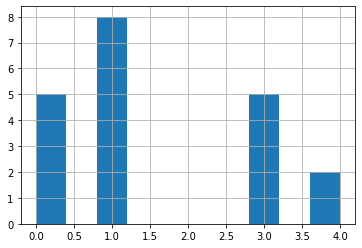

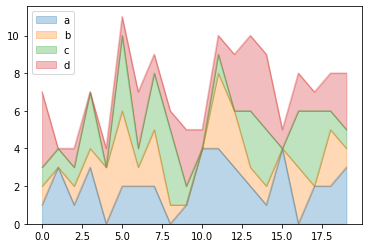

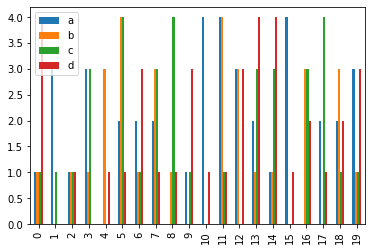

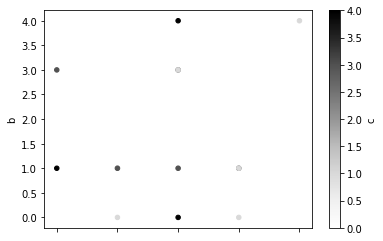

In [19]:
import numpy as np
import pandas as pd

# creamos una matriz de 2x4 con numeros aleatorios de 0 a 5
matriz = np.random.randint(5, size=(20,4)) 
dataframe = pd.DataFrame(matriz, columns=['a','b','c','d']) # agregamos el nombre de las columnas que compondrán la tabla
print(dataframe)

# creamos un histograma
print(dataframe['b'].hist())

# creamos una gráfica con los valores de las columnas
print(dataframe.plot.area(alpha=0.3)) # alpha = valor de transparencia

# gráfico de barras
print(dataframe.plot.bar()) # stacked=True si queremos acumular valores en las barras.

# grafico tipo scatter
dataframe.plot.scatter(x='a',y='b',c='c',cmap='coolwarm') # identificamos las columnas según la escala de grises
# 'coolwarm' sería una paleta de colores distinta (más cálida)



## Ejercicio 1: 

In [34]:
import numpy as mp
import pandas as pd

asignaturas = ['matemáticas', 'fisica', 'historia']
notas = [9,9,8]
serie = pd.Series(index=asignaturas, data=notas)
print(serie)
nota_fisica = serie['fisica']
print('La nota de física que has sacado es ',nota_fisica)

matemáticas    9
fisica         9
historia       8
dtype: int64
La nota de física que has sacado es  9


## Ejercicio 2: 

In [56]:
import numpy as mp
import pandas as pd

filas = ['ventas_enero','ventas_febrero','ventas_marzo']
columnas =['oficina_1','oficina_2','oficina_3']


ventas_enero = np.random.randint(100,500,3)
ventas_febrero = np.random.randint(100,500,3)
ventas_marzo = np.random.randint(100,500,3)

ventas = [ventas_enero,ventas_febrero,ventas_marzo]

dataframe = pd.DataFrame(index=filas, columns=columnas, data=ventas)
print(dataframe)

print("\nLas ventas de enero para la oficina_1 son: ",dataframe['oficina_1']['ventas_enero'])
# tambien se puede poner como : dataframe.loc['ventas_enero']['oficina_1']

                oficina_1  oficina_2  oficina_3
ventas_enero          457        442        288
ventas_febrero        492        313        413
ventas_marzo          357        488        188

Las ventas de enero para la oficina_1 son:  457
